In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
# Matrix of eigenvectors and its inverse
P = np.array([[0,1],[1,1]])
Pinv = la.inv(P)
# Matrix of eigenvalues
D = np.array([[3,0],[0,3]])
# Matrix with eigne vectors P and values in D
A = P@D@Pinv
print(A)

[[3. 0.]
 [0. 3.]]


In [3]:
# Command for finding eigenvectors and values if we didn't already know them
eigenvals,eigenvecs = la.eig(A)
print(eigenvals)
print(eigenvecs)
# Note that the eigenvectors have been normalized

[3. 3.]
[[1. 0.]
 [0. 1.]]


In [4]:
# Array of 360 angles, in radians.
T = np.linspace(0,2*np.pi,360)
# Points on a unit circle corresponding to the angles in T
Circle = np.array([[np.cos(t),np.sin(t)] for t in T])
Circle.shape

(360, 2)

In [5]:
# Calculate the effect of repeatedly applying A to the Circle
# The results are saved as a list of images represented by coordinates
Images = []
Image = Circle
for i in range(24):
    Images += [Image]
    Image = Image @ A.transpose()
for i in range(6):
    print(np.max(Images[i]))

1.0
3.0
9.0
27.0
81.0
243.0


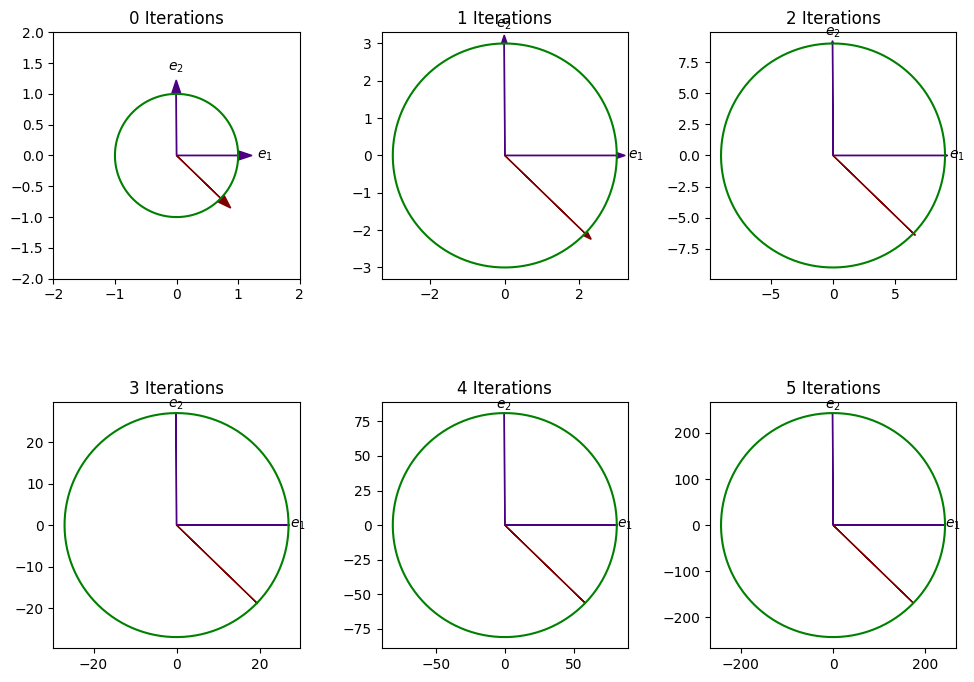

In [6]:
X = np.linspace(-3,3,100)
fig,ax=plt.subplots(ncols=3, nrows=2,figsize=(12,8))
# plt.setp(ax,ylim=(-6,6),xlim=(-6,6)) #aspect=1
plt.subplots_adjust(hspace=0.5)
for i in range(6):
    col = i%3
    row = i//3

    # Set the appearnace of the plot
    ax[row,col].set_aspect(1)
    MaxLimit = np.max([np.max(Images[i])*1.1,2])
    ax[row,col].set_xlim(-MaxLimit,MaxLimit)
    ax[row,col].set_ylim(-MaxLimit,MaxLimit)

    # The image of the circle
    ax[row,col].plot(Images[i][:,0],Images[i][:,1],"g")

    # Images of elementray basis vectors
    # Coordinates of the images
    e1 = np.array([Images[i][0,0],Images[i][0,1]])
    e2 = np.array([Images[i][90,0],Images[i][90,1]])
    # Coordinates for the annotations
    a1 = e1*(1+0.3/la.norm(e1))
    a2 = e2*(1+0.3/la.norm(e2))
    ax[row,col].arrow(0,0,e1[0],e1[1],color="indigo",head_width=0.15)
    ax[row,col].annotate("$e_1$",(a1[0],a1[1]),va="center",ha="left")
    ax[row,col].arrow(0,0,e2[0],e2[1],color="indigo",head_width=0.15)
    ax[row,col].annotate("$e_2$",(a2[0],a2[1]),va="bottom",ha="center")

    # Images of eigenvectors
    # ax[row,col].arrow(0,0,Images[i][45,0],Images[i][45,1],color="maroon",head_width=0.15)
    ax[row,col].arrow(0,0,Images[i][315,0],Images[i][315,1],color="maroon",head_width=0.15)

    # Add a title
    ax[row,col].set_title(str(i)+" Iterations")

In [7]:
fig.savefig("eigenPlots2.png")

In [8]:
# Matrix of eigenvectors and its inverse
P3 = np.array([[1,0,0],[0,1,0],[0,1,1]])
P3inv = la.inv(P3)
# Matrix of eigenvalues
D3 = np.array([[3,0,0],[0,3,0],[0,0,1]])
# Matrix with eigne vectors P and values in D
A3 = P3@D3@P3inv
print(A3)

[[3. 0. 0.]
 [0. 3. 0.]
 [0. 2. 1.]]


In [9]:
T = np.linspace(0,2*np.pi,90)
S = np.linspace(0,np.pi,45)
Sphere = []
for s in S:
    for t in T:
        Sphere+=[[np.cos(t)*np.sin(s),np.sin(t)*np.sin(s),np.cos(s)]]
Sphere = np.array(Sphere)

In [10]:
XData = Sphere[:,0]
YData = Sphere[:,1]
ZData = Sphere[:,2]
XData.shape

(4050,)

/tmp/ipykernel_20460/2348608343.py:4: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(1-(X**2+Y**2))
/tmp/ipykernel_20460/2348608343.py:5: RuntimeWarning: invalid value encountered in sqrt
  nZ = -1*np.sqrt(1-(X**2+Y**2))


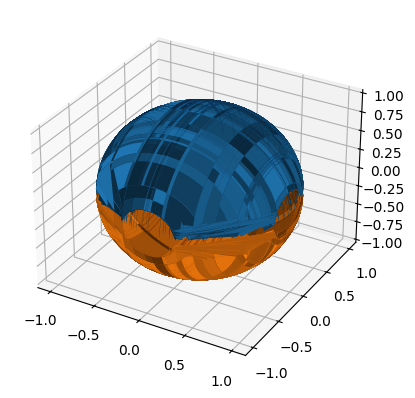

In [11]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection="3d")
X, Y =np.meshgrid(XData,YData)
Z = np.sqrt(1-(X**2+Y**2))
nZ = -1*np.sqrt(1-(X**2+Y**2))
ax3.plot_surface(X,Y,Z)
ax3.plot_surface(X,Y,nZ)

In [12]:
Z.shape

(4050, 4050)

In [13]:
Y.shape

(4050, 4050)

In [14]:
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))


In [15]:
x.shape

(100, 100)

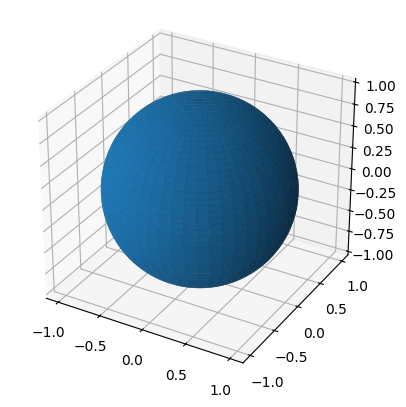

In [16]:

fig4 = plt.figure()
ax4 = fig4.add_subplot(projection='3d')

# Plot the surface
ax4.plot_surface(x, y, z)

# Set an equal aspect ratio
ax4.set_aspect('equal')

plt.show()
